In [1]:
#importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

#from Database.py import Airbnbs, Hosts, Airbnb_Details, Neighbourhoods, creating_engine, creating_session, closing_session

In [194]:
"""#Creating engine
engine1 = creating_engine()

#Creating session
session1 = creating_session(engine1)"""

'#Creating engine\nengine1 = creating_engine()\n\n#Creating session\nsession1 = creating_session(engine1)'

## Leemos el dataset

In [45]:
df_airbnb=pd.read_csv("Airbnb_Open_Data.csv")
df_airbnb.head(2)

C:\Users\Guatavo\AppData\Local\Temp\ipykernel_14048\3502115835.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb=pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


## ¿Qué tipo de dato son las variables del conjunto de datos?

In [46]:
df_airbnb.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [47]:
(
    df_airbnb
    .dtypes
    .value_counts()
)

object     15
float64     9
int64       2
dtype: int64

##  ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [3]:
df_airbnb.shape

(102599, 26)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [199]:
(
    df_airbnb
    .isnull()
    .any()
)

id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country code                       True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True


## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [48]:
(
    df_airbnb
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

## ¿Cuál es la proporción de valores nulos por cada variable? 

C:\Users\Guatavo\anaconda3\envs\fundamentos-etl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


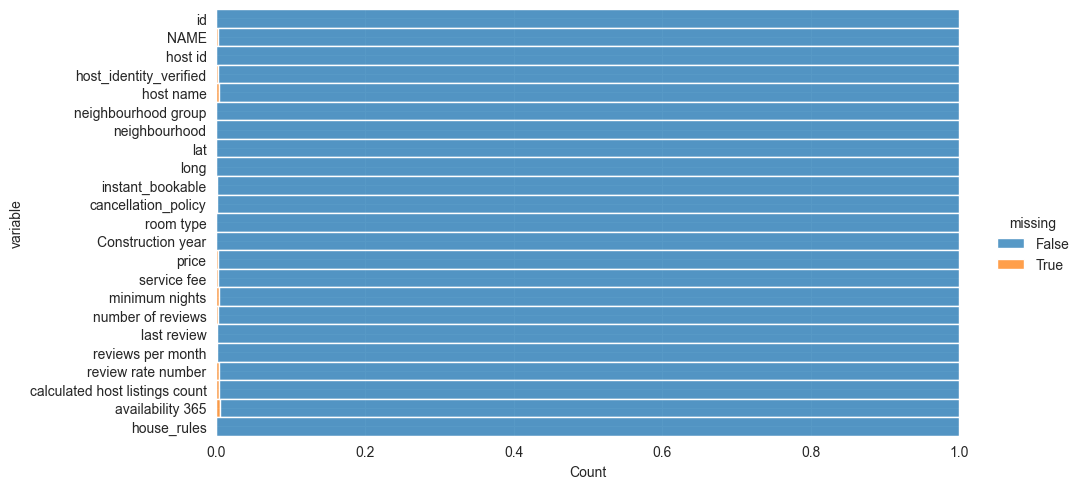

In [73]:
(
    df_airbnb
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [74]:
(
    df_airbnb
    .isnull()
    .sum()
)

id                                  0
NAME                              250
host id                             0
host_identity_verified            289
host name                         406
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                   0
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
last review                       159
reviews per month                 145
review rate number                326
calculated host listings count    319
availability 365                  448
house_rules                         0
dtype: int64

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

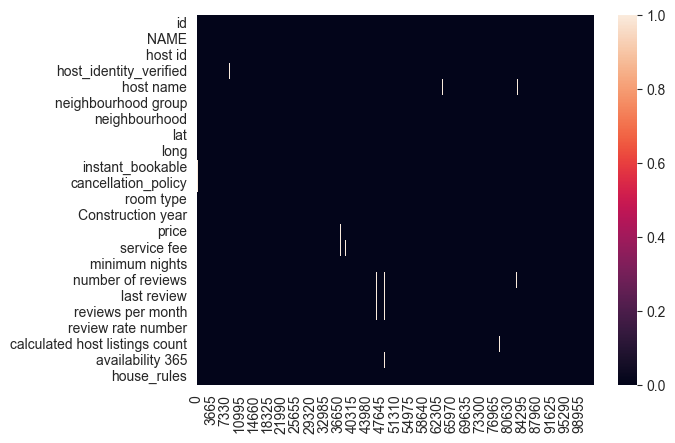

In [72]:
(
    df_airbnb
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [75]:
df_airbnb2 = (
    df_airbnb
    .dropna()
)

df_airbnb2

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,...,1060.0,212.0,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,...,844.0,169.0,1.0,0.0,0,0.00,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,...,837.0,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,...,988.0,198.0,3.0,0.0,0,0.00,5.0,1.0,342.0,No se Especificaron Las Reglas
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,...,546.0,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,No se Especificaron Las Reglas


# Conteos y proporciones
## Analisis descriptivo

## Solo las numericas

In [58]:
df_airbnb.describe(include=[np.number])

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [207]:
## Solo categoricas

In [59]:
df_airbnb.describe(include=object)

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
count,102349,102310,102193,102570,102583,102067,102468,102494,102523,102599,102352,102326,86706,50468,2
unique,61281,2,13190,7,224,1,1,2,3,4,1151,231,2477,1976,1
top,Home away from home,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,$206,$41,6/23/2019,#NAME?,41662/AL
freq,33,51200,881,43792,7937,102067,102468,51474,34343,53701,137,526,2443,2712,2


## correlation_matrix

C:\Users\Guatavo\AppData\Local\Temp\ipykernel_14048\2080429719.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_airbnb.corr()


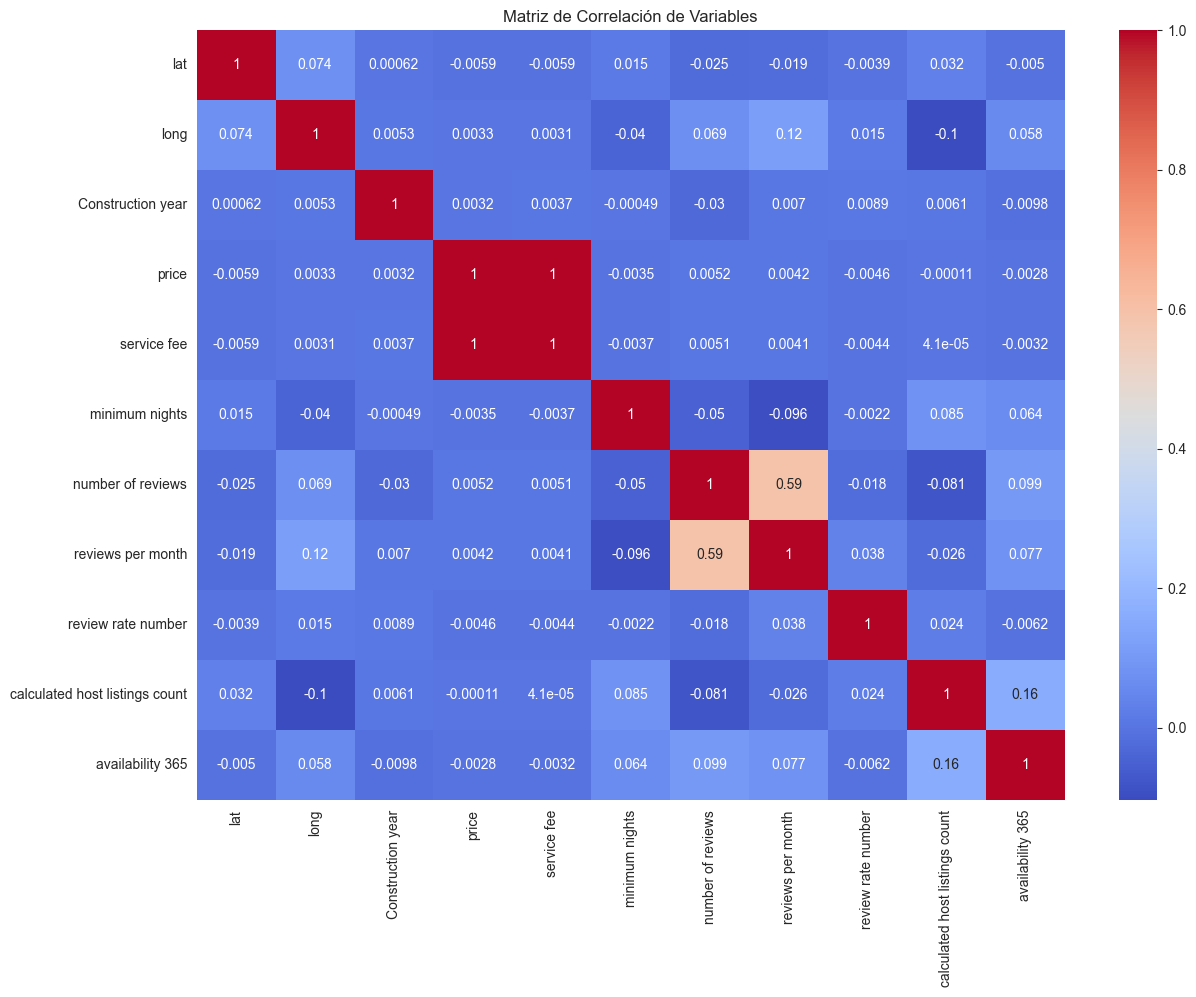

In [30]:
#toca pasar los id a tipo objetos y dejar solo las variables que son realmente numericas, como numericas
correlation_matrix = df_airbnb.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables')
plt.show()

# Transform

## Drop Columns

### We can certainly see that the column "license" has no sense to keep it, so we proceed to delete it, and it's also known that all the information comes from the USA, so the columns "country" and "country code" don't provide any value. 

In [60]:
df_airbnb.drop(["license", "country", "country code"], axis=1, inplace=True)
print(df_airbnb.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')


## Normalizar los tipos de datos.


### Normalizando variables Categoricas

In [61]:
#Cambiar id a variable categorica
df_airbnb["id"] = df_airbnb["id"].astype(object)


#Cambiar id a variable categorica
df_airbnb["host id"] = df_airbnb["host id"].astype(object)

## Normalizando variables numericas
### Limpiamos de signos como "$" y espacios y  Cambiamos la columna "price" de tipo object a float64 

In [62]:
df_airbnb["price"] = df_airbnb["price"].str.replace('$', '').str.replace(',', '').str.strip()
df_airbnb["price"] = df_airbnb["price"].astype(float)
# Verifica el tipo de datos de la columna después de la conversión
print(df_airbnb.dtypes)

id                                 object
NAME                               object
host id                            object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                             float64
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
dtype: object


C:\Users\Guatavo\AppData\Local\Temp\ipykernel_14048\3039082674.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb["price"] = df_airbnb["price"].str.replace('$', '').str.replace(',', '').str.strip()


### Limpiamos de signos como "$" y espacios y  Cambiamos la columna "service fee" de tipo object a float64 

In [63]:
df_airbnb["service fee"] = df_airbnb["service fee"].str.replace('$', '').str.replace(',', '').str.strip()
df_airbnb["service fee"] = df_airbnb["service fee"].astype(float)

C:\Users\Guatavo\AppData\Local\Temp\ipykernel_14048\2114608852.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb["service fee"] = df_airbnb["service fee"].str.replace('$', '').str.replace(',', '').str.strip()


## Rellenamos los valores nulos con 0 haciendo  alusion de que no fueron colocados

In [64]:
# Limpia los valores no finitos en la columna "Construction year"
df_airbnb["Construction year"] = df_airbnb["Construction year"].replace([np.inf, -np.inf], np.nan)
df_airbnb["Construction year"] = df_airbnb["Construction year"].fillna(0)  # Rellenar valores nulos con 0 o el valor que consideres

## Cambiamos la columna "Construction year" de tipo float64 a int32, ya que los años son enteros. 

In [66]:
df_airbnb["Construction year"] = df_airbnb["Construction year"].astype(int)
df_airbnb.dtypes

id                                 object
NAME                               object
host id                            object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                   int32
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
dtype: object

## Verificando la relacion de cuando la columna number of reviews es 0,  reviews per month y last review tambien son nulos.

In [67]:
filtered_df = df_airbnb[df_airbnb["number of reviews"] == 0]
# Muestra los registros filtrados
print(filtered_df)

# Cuenta los valores nulos en la columna "last_review"
null_last_review = filtered_df["last review"].isnull().sum()
# Cuenta los valores nulos en la columna "reviews_per_month"
null_reviews_per_month = filtered_df["reviews per month"].isnull().sum()

# Muestra los resultados
print("Registros nulos en last review:", null_last_review)
print("Registros nulos en reviews per month:", null_reviews_per_month)

             id                                               NAME  \
2       1002403                THE VILLAGE OF HARLEM....NEW YORK !   
20      1012382                  Huge 2 BR Upper East  Cental Park   
27      1016248  Magnifique Suite au N de Manhattan - vue Cloitres   
37      1021771                        Clean and Quiet in Brooklyn   
39      1022876                          Country space in the city   
...         ...                                                ...   
102590  6090228                Wonderful artists' loft in Brooklyn   
102592  6091333                3BR/1 Ba in TriBeCa w/ outdoor deck   
102594  6092437                         Spare room in Williamsburg   
102596  6093542                     Comfy, bright room in Brooklyn   
102598  6094647                               585 sf Luxury Studio   

            host id host_identity_verified host name neighbourhood group  \
2       78829239556                    NaN     Elise           Manhattan   
20     

### Reemplaza los valores nulos por 0 en las columnas "last review" y "reviews per month". Cuando la columna number of reviews es 0.


In [69]:
df_airbnb.loc[df_airbnb["number of reviews"] == 0, "last review"] = 0
df_airbnb.loc[df_airbnb["number of reviews"] == 0, "reviews per month"] = 0

# Limpiar la Columna house_rules

In [71]:
df_airbnb["house_rules"] = df_airbnb["house_rules"].fillna("No se Especificaron Las Reglas")

## Miraremos si hay filas que tienen bastantes nulos en sus diferentes columnas

In [80]:
# Calcula el número de valores nulos en cada fila
null_count_per_row = df_airbnb.isnull().sum(axis=1)

# Filtra las filas con más de una columna nula
rows_with_multiple_nulls = df_airbnb[null_count_per_row > 4]

print(rows_with_multiple_nulls)

          id NAME      host id host_identity_verified host name  \
98   1055461  NaN   2531706698                    NaN  Victoria   
99   1056014  NaN  31493374340               verified       NaN   
100  1056566  NaN  47504416702            unconfirmed       NaN   

    neighbourhood group       neighbourhood       lat      long  \
98            Manhattan              Harlem  40.82803 -73.94731   
99            Manhattan             Chelsea  40.74008 -74.00271   
100            Brooklyn  Bedford-Stuyvesant  40.68413 -73.92357   

    instant_bookable  ...  price service fee  minimum nights  \
98               NaN  ...  160.0        32.0             NaN   
99               NaN  ...  528.0       106.0             NaN   
100              NaN  ...  739.0       148.0             NaN   

     number of reviews  last review  reviews per month  review rate number  \
98                 1.0    10/9/2018               0.11                 NaN   
99                30.0     5/1/2019              

## Empezamos a segmentar la info para crear el datawarehouse

In [11]:
host_table = df_airbnb[["host id", "host name", "host_identity_verified"]]
host_table.head(2)

,host id,host name,host_identity_verified
0,80014485718,Madaline,unconfirmed
1,52335172823,Jenna,verified


In [12]:
neighbourhood_table = df_airbnb[["neighbourhood group", "neighbourhood", "lat", "long"]]
neighbourhood_table.insert(0, "neighbourhood_id", range(1, 1 + len(neighbourhood_table)))
df_airbnb["neighbour_id"] = neighbourhood_table["neighbourhood_id"]
neighbourhood_table.head(2)

,neighbourhood_id,neighbourhood group,neighbourhood,lat,long
0,1,Brooklyn,Kensington,40.64749,-73.97237
1,2,Manhattan,Midtown,40.75362,-73.98377


In [211]:
airbnb_detail = df_airbnb[
    ["id", "NAME", "instant_bookable", 
     "cancellation_policy", "room type", "Construction year", 
     "price", "service fee", "minimum nights", "number of reviews", 
     "last review", "reviews per month", "review rate number", "calculated host listings count", 
     "availability 365", "house_rules"]]

airbnb_detail.head(2)

,id,NAME,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...


In [212]:
#Delete the following columns ince we already set up diferent tables to save all the information related with neighbourhoods and hots
df_airbnb.drop(["neighbourhood group", "neighbourhood", "lat", "long"], axis=1, inplace=True)
df_airbnb.drop(["host name", "host_identity_verified"], axis=1, inplace=True)
df_airbnb.drop(["NAME", "instant_bookable", 
     "cancellation_policy", "room type", "Construction year", 
     "price", "service fee", "minimum nights", "number of reviews", 
     "last review", "reviews per month", "review rate number", "calculated host listings count", 
     "availability 365", "house_rules"], axis=1, inplace=True)

In [213]:
renaming_columns = {
    "id" : "airbnb_id",
}
df_airbnb.rename(columns=renaming_columns, inplace=True)
df_airbnb.head(2)

,airbnb_id,host id,neighbour_id
0,1001254,80014485718,1
1,1002102,52335172823,2


In [216]:
airbnb_detail.columns

Index(['id', 'NAME', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')

In [218]:
neighbourhood_table.columns

Index(['neighbourhood_id', 'neighbourhood group', 'neighbourhood', 'lat',
       'long'],
      dtype='object')

In [217]:
host_table.columns

Index(['host id', 'host name', 'host_identity_verified'], dtype='object')

In [219]:
df_airbnb.columns

Index(['airbnb_id', 'host id', 'neighbour_id'], dtype='object')